<a href="https://colab.research.google.com/github/Vai5h/NLP-IIIT/blob/main/unit_1_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identify the voiced, unvoiced, silence and plosive regions.**

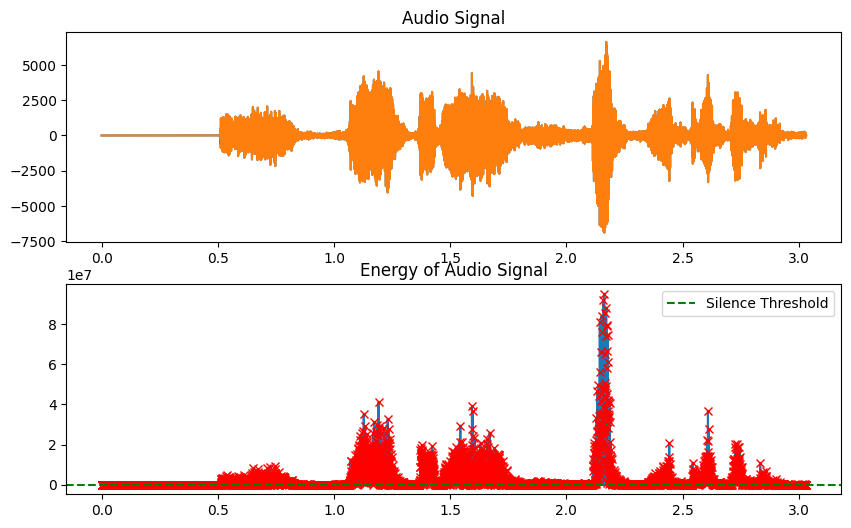

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

# Load the audio file
sample_rate, audio_data = wavfile.read('/content/Mom name.wav')

# Calculate the energy of the audio signal
energy = np.sum(audio_data.astype(np.int64) ** 2, axis=1)

# Set a threshold to differentiate between silence and sound
silence_threshold = np.percentile(energy, 5)
silence_mask = energy < silence_threshold

# Identify peaks to find plosive regions
peaks, _ = find_peaks(energy, height=silence_threshold)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(audio_data)) / sample_rate, audio_data)
plt.title('Audio Signal')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(energy)) / sample_rate, energy)
plt.plot(peaks / sample_rate, energy[peaks], 'x', color='red')
plt.axhline(y=silence_threshold, color='green', linestyle='--', label='Silence Threshold')
plt.title('Energy of Audio Signal')

plt.legend()
plt.show()


** Spectral details for sounds units present in the waveform**

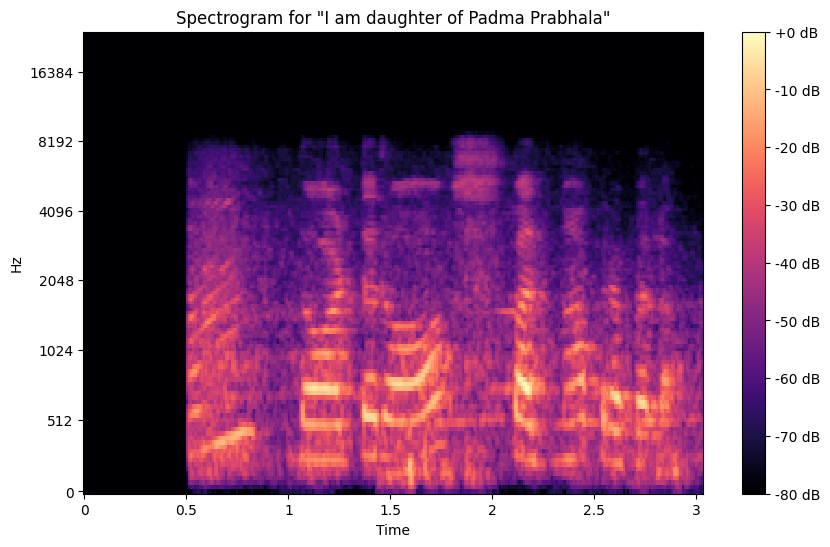

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/content/Mom name.wav'
audio, sr = librosa.load(file_path, sr=None)

# Create a spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Spectrogram for "I am daughter of Padma Prabhala"')
plt.colorbar(format='%+2.0f dB')
plt.show()
